**Description**

Resettlement arrivals of refugees in the United States

**Summary**

This page presents information on resettlement arrivals of refugees, with or without UNHCR assistance. This dataset is based on Government statistics and, in principle, excludes humanitarian admissions.

Caveats - In the most-recent data, figures between 1 and 4 have been replaced with an asterisk (*). These represent situations where the figures are being kept confidential to protect the anonymity of individuals. Such figures are not included in any totals. Dataset may be empty if the UNHCR dataset does not currently contain any matching records.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt # visualization tool
import os
from IPython.display import display
pd.options.display.max_rows = None
import warnings; warnings.simplefilter('ignore')

In [2]:
# loading data 
df = pd.read_csv("unhcr-resettlement-residing-usa-csv-1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 4 columns):
Country / territory of asylum/residence    1739 non-null object
Origin                                     1739 non-null object
Year                                       1739 non-null object
Value                                      1739 non-null object
dtypes: object(4)
memory usage: 54.5+ KB


In [4]:
df.head()

,Country / territory of asylum/residence,Origin,Year,Value
0,#country+asylum,#country+origin,#date+year,#affected
1,United States of America,Afghanistan,1982,4300
2,United States of America,Albania,1982,14
3,United States of America,Angola,1982,120
4,United States of America,Argentina,1982,2


In [5]:
# since this row is meaningless we will drop it
df.iloc[0]

Country / territory of asylum/residence    #country+asylum
Origin                                     #country+origin
Year                                            #date+year
Value                                            #affected
Name: 0, dtype: object

In [6]:
df.drop(df.index[0], inplace = True)

In [7]:
# content of Country / territory of asylum/residence
df['Country / territory of asylum/residence'].value_counts()

United States of America    1738
Name: Country / territory of asylum/residence, dtype: int64

In [8]:
df.drop(['Country / territory of asylum/residence'], axis = 1, inplace = True)

In [9]:
# Our dataset now
df.head(5)

,Origin,Year,Value
1,Afghanistan,1982,4300
2,Albania,1982,14
3,Angola,1982,120
4,Argentina,1982,2
5,Bulgaria,1982,122


In [10]:
df.describe()

,Origin,Year,Value
count,1738,1738,1738
unique,131,36,687
top,Iraq,2016,1
freq,36,83,153


## Data Cleaning and Data Wrangling

In [11]:
# Examine if their is any missing data
np.sum(df.isnull() == True)

Origin    0
Year      0
Value     0
dtype: int64

In [12]:
# we will removed those '*' value
df = df[df.Value != '*']

In [13]:
df['Origin'] = df['Origin'].astype('str')
df[['Year', 'Value']] = df[['Year', 'Value']].astype('str').astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1711 entries, 1 to 1738
Data columns (total 3 columns):
Origin    1711 non-null object
Year      1711 non-null int32
Value     1711 non-null int32
dtypes: int32(2), object(1)
memory usage: 40.1+ KB


In [15]:
df.describe()

,Year,Value
count,1711.000000,1711.000000
mean,2003.346581,1563.092928
std,9.526003,5184.631006
min,1982.000000,1.000000
25%,1997.000000,6.000000
50%,2005.000000,39.000000
75%,2011.000000,577.500000
max,2017.000000,61298.000000


In [16]:
# assigning all columns to a variable
origin = df['Origin']
year = df['Year']
value = df['Value']

Alhamdulillah as our data is now Insha Allah clean, we can now proceed with Exploratory Data Analysis(EDA)

## Exploratory Data Analysis

if there is anomaly discovered in our data throughout this EDA we will back to cleaning and wrangling em

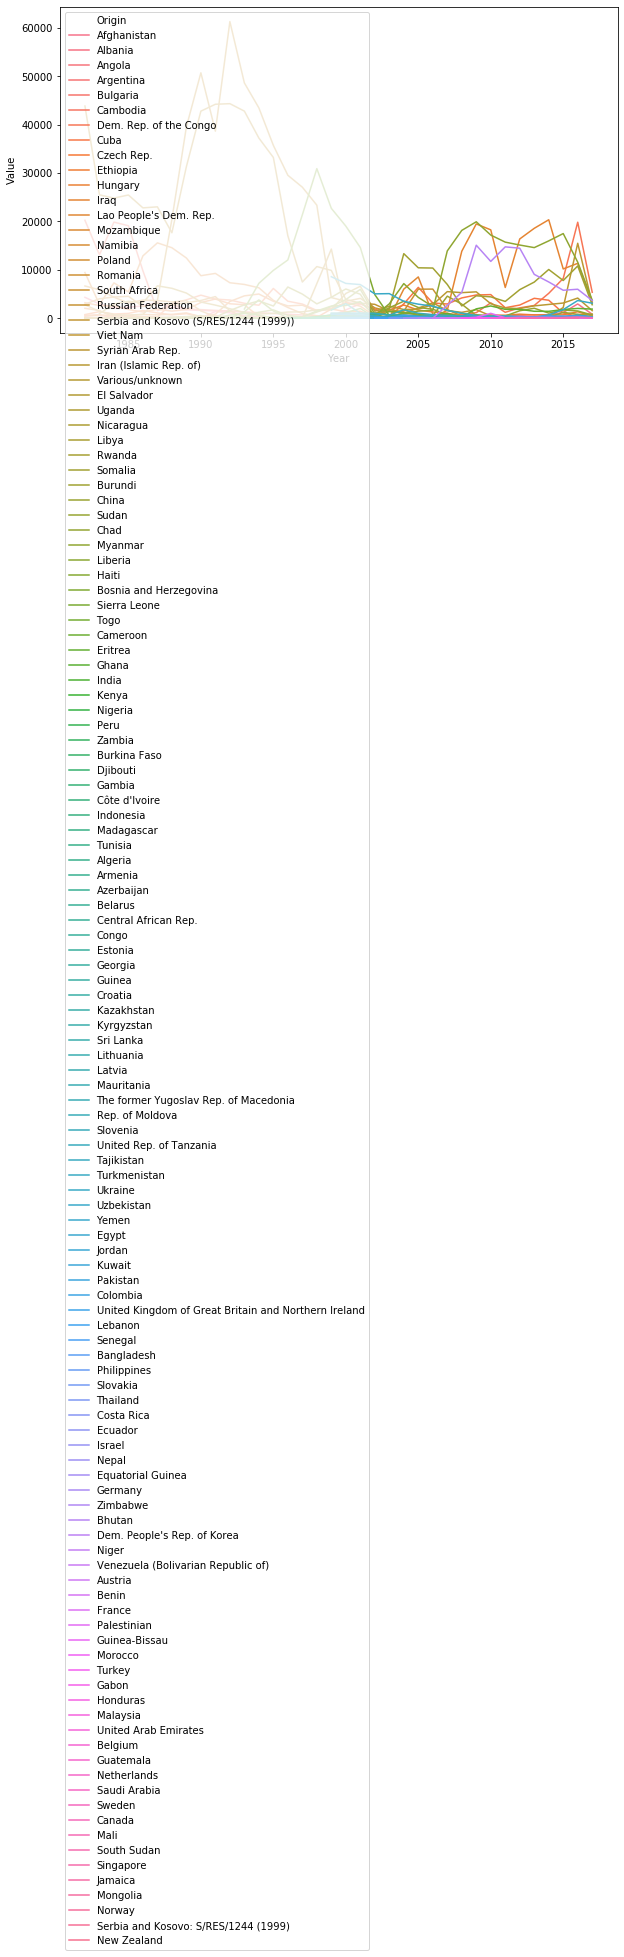

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="Year", y="Value", hue="Origin", data=df)

In [18]:
def byOrigin(origin):
    return df[df.Origin == origin].sort_values('Year')

refugee = byOrigin('Afghanistan')

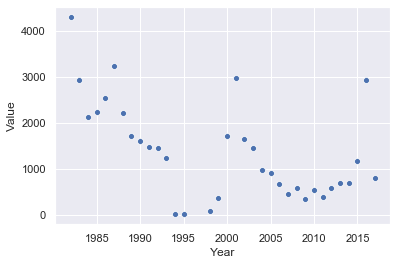

In [19]:
sns.set()
ax = sns.scatterplot(x="Year", y="Value", data=refugee)

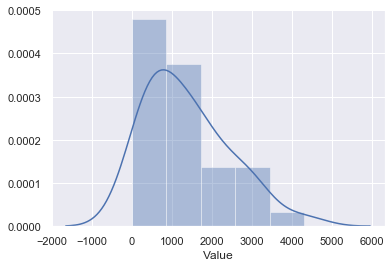

In [20]:
ax = sns.distplot(refugee.Value)

In [30]:
# create training and testing data
df['Value_count'] = df['Value'].sum()
x = df['Year']
y = df['Value_count'] #total value for each year

In [28]:
df.head()

,Origin,Year,Value,Value_count
1,Afghanistan,1982,4300,1711
2,Albania,1982,14,1711
3,Angola,1982,120,1711
4,Argentina,1982,2,1711
5,Bulgaria,1982,122,1711


In [22]:
from sklearn.model_selection import KFold # import KFold
from sklearn.linear_model import LinearRegression
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # array1
y = np.array([1, 2, 3, 4]) # array2
kf = KFold(n_splits=2) # split into 2 folds
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [23]:
for train_index, test_index in kf.split(x):
 print('TRAIN:', train_index, 'TEST:', test_index)
 x_train, x_test = x[train_index], x[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [24]:
# fit the model
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# define one new data instance
xnew = [[-1.07296862, -0.52817175]]
# make a prediction
ynew = model.predict(xnew)
# show the inputs and predicted outputs
print("x=%s, Predicted=%s" % (xnew[0], ynew[0]))

x=[-1.07296862, -0.52817175], Predicted=0.8497149075000002


In [ ]:
shit aku lost, sorry